Inicialmente irei importar a biblioteca request para fazer a solicitação por meio do GET.

In [1]:
import requests #Library to making HTTP requests.

In [2]:
response = requests.get('https://google.com/')
print(response)

<Response [200]>


A solicitação retorna uma resposta, um objeto para inspecionar os resultados da solicitação. Usando o response, você pode examinar os cabeçalhos e o conteúdo da resposta, obter um dicionário com dados do JSON na resposta e também determinar o êxito do nosso acesso ao servidor pelo código de resposta dele. No nosso exemplo, o código de resposta era 200, o que significa que a solicitação foi bem-sucedida. Em nosso exemplo o codiogo 200 significa que a requisição foi OK.

- 200 – OK. The request was successful. The answer itself depends on the method used (GET, POST, etc.) and the API specification.
- 204 – No Content. The server successfully processed the request and did not return any content.
- 301 – Moved Permanently. The server responds that the requested page (endpoint) has been moved to another address and redirects to this address.
- 400 – Bad Request. The server cannot process the request because the client-side errors (incorrect request format).
- 401 – Unauthorized. Occurs when authentication was failed, due to incorrect credentials or even their absence.
- 403 – Forbidden. Access to the specified resource is denied.
- 404 – Not Found. The requested resource was not found on the server.
- 500 – Internal Server Error. Occurs when an unknown error has occurred on the server.

In [10]:
if response:
    print('Request is successful.')
else:
    print('Request returned an error.') 

Request is successful.


- API Endpoint

Um API Endpoint é o ponto de entrada em um canal de comunicação quando dois sistemas estão interagindo. Refere-se aos pontos de contato da comunicação entre uma API e um servidor. É basicamente a URL do server

O local onde a API envia uma solicitação e onde a resposta emana é o que é conhecido como Endpoint. Acredita-se que o terminal seja a parte mais crucial da documentação da API. 

API refere-se a todo o conjunto de protocolos que permite a comunicação entre dois sistemas, enquanto Endpoint é uma URL que permite à API obter acesso a recursos em um servidor. Portanto, o desempenho e a produtividade das APIs dependem de sua capacidade de interagir e se comunicar com os Endpoints de forma eficaz.

Geralmente, um Endpoint é um endereço específico (por exemplo, https://weather-in-london.com/forecast), referindo-se ao qual você obtém acesso a determinados recursos / dados (no nosso caso - a previsão do tempo para Londres) .



In [11]:
response = requests.post("https://api.nasa.gov/planetary/apod?api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz",
 headers={
   "X-RapidAPI-Host": "andreleocadio4@gmail.com",
   "X-RapidAPI-Key": "3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz",
   "Content-Type": "application/x-www-form-urlencoded"
 }
)

In [12]:
print(response)

<Response [405]>


In [2]:
import urllib
from urllib.request import urlretrieve #Biblioteca para manipulação de URLs
from pprint import PrettyPrinter #Biblioteca para imprimir estruturas de dados de forma formatada.

In [14]:
pp = PrettyPrinter()  #A instância "pp" do PrettyPrinter será usada para embelezar a saída JSON.

In [15]:
#Indicando o API Key

apiKey = '3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'

Os APIs a serem abordados nesse projeto será:

- APOD-Foto astronomica do dia.
- Asteroids NeoWs — NeoWs (Near Earth Object Web Service)
- EPIC — Câmera de imagem policromática terrestre

In [16]:
# Começarei consumindo o APOD API

def fetchAPOD():
    URL_APOD = "https://api.nasa.gov/planetary/apod"
    date = '2020-07-16'
    params = {'api_key':apiKey,
      'date':date,
      'hd':'True'
    }
    response = requests.get(URL_APOD,params=params).json()
    pp.pprint(response)

fetchAPOD()

{'copyright': 'Petr Horalek',
 'date': '2020-07-16',
 'explanation': 'This Comet NEOWISE (C/2020 F3) now sweeps through our fair '
                "planet's northern skies. Its long tails stretch across this "
                'deep skyview from Suchy Vrch, Czech Republic. Recorded on the '
                'night of July 13/14, the composite of untracked foreground '
                'and tracked and filtered sky exposures teases out details in '
                "the comet's tail not visible to the unaided eye. Faint "
                'structures extend to the top of the frame, over 20 degrees '
                "from the comet's bright coma. Pushed out by the pressure of "
                "sunlight itself, the broad curve of the comet's yellowish "
                'dust tail is easy to see by eye. But the fainter, more bluish '
                'tail is separate from the reflective comet dust. The fainter '
                'tail is an ion tail, formed as ions from the cometary coma '
    

In [32]:
urllib.request.urlretrieve("https://apod.nasa.gov/apod/image/2007/2020_07_14_NEOWISE_Suchy_Vrch_1263px.jpg", "nasa-APOD.jpg")

('nasa-APOD.jpg', <http.client.HTTPMessage at 0x18d98a7f0f0>)

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('nasa-APOD.jpg')

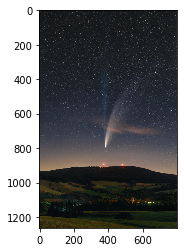

In [34]:
imgplot = plt.imshow(img)

Asteroids NeoWs API

- Os dados podem ser usados para estudar o caminho dos asteróides e sua probabilidade de impacto com outros Neos.

In [36]:
def fetchAsteroidNeowsFeed():
    URL_NeoFeed = "https://api.nasa.gov/neo/rest/v1/feed"
    params = {
      'api_key':apiKey,
      'start_date':'2020-07-09',
      'end_date':'2020-07-16'
    }
    response = requests.get(URL_NeoFeed,params=params).json()
    pp.pprint(response)

fetchAsteroidNeowsFeed()

{'element_count': 81,
 'links': {'next': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-07-16&end_date=2020-07-23&detailed=false&api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz',
           'prev': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-07-02&end_date=2020-07-09&detailed=false&api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz',
           'self': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-07-09&end_date=2020-07-16&detailed=false&api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
 'near_earth_objects': {'2020-07-09': [{'absolute_magnitude_h': 26.251,
                                        'close_approach_data': [{'close_approach_date': '2020-07-09',
                                                                 'close_approach_date_full': '2020-Jul-09 '
                                                                                             '15:34',
                                                                 'epoch_date_close_approach': 1594

                                                               'miles': {'estimated_diameter_max': 0.1470249225,
                                                                         'estimated_diameter_min': 0.0657515442}},
                                        'id': '3776854',
                                        'is_potentially_hazardous_asteroid': False,
                                        'is_sentry_object': False,
                                        'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/3776854?api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
                                        'name': '(2017 NR6)',
                                        'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3776854',
                                        'neo_reference_id': '3776854'},
                                       {'absolute_magnitude_h': 23.376,
                                        'close_approach_data': [{'close_approach_date': '2020-07-1

                                                               'kilometers': {'estimated_diameter_max': 0.1794898848,
                                                                              'estimated_diameter_min': 0.0802703167},
                                                               'meters': {'estimated_diameter_max': 179.4898847799,
                                                                          'estimated_diameter_min': 80.2703167283},
                                                               'miles': {'estimated_diameter_max': 0.1115298092,
                                                                         'estimated_diameter_min': 0.049877647}},
                                        'id': '3117468',
                                        'is_potentially_hazardous_asteroid': False,
                                        'is_sentry_object': False,
                                        'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/3

                                                                              'estimated_diameter_min': 0.0285334954},
                                                               'meters': {'estimated_diameter_max': 63.802835336,
                                                                          'estimated_diameter_min': 28.5334953937},
                                                               'miles': {'estimated_diameter_max': 0.0396452316,
                                                                         'estimated_diameter_min': 0.0177298866}},
                                        'id': '54017581',
                                        'is_potentially_hazardous_asteroid': False,
                                        'is_sentry_object': False,
                                        'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/54017581?api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
                                        'name': '(2020 MU1

                                                                         'estimated_diameter_min': 0.3005425432}},
                                        'id': '3352688',
                                        'is_potentially_hazardous_asteroid': False,
                                        'is_sentry_object': False,
                                        'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/3352688?api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
                                        'name': '(2006 UD63)',
                                        'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3352688',
                                        'neo_reference_id': '3352688'},
                                       {'absolute_magnitude_h': 24.5,
                                        'close_approach_data': [{'close_approach_date': '2020-07-13',
                                                                 'close_approach_date_full': '2020-Jul-13 '
  

                                        'neo_reference_id': '3819680'},
                                       {'absolute_magnitude_h': 19.2,
                                        'close_approach_data': [{'close_approach_date': '2020-07-14',
                                                                 'close_approach_date_full': '2020-Jul-14 '
                                                                                             '01:01',
                                                                 'epoch_date_close_approach': 1594688460000,
                                                                 'miss_distance': {'astronomical': '0.2438462716',
                                                                                   'kilometers': '36478882.838801492',
                                                                                   'lunar': '94.8561996524',
                                                                                   'miles': '2

                                                                 'epoch_date_close_approach': 1594938000000,
                                                                 'miss_distance': {'astronomical': '0.2999319361',
                                                                                   'kilometers': '44869178.785536107',
                                                                                   'lunar': '116.6735231429',
                                                                                   'miles': '27880414.8653159966'},
                                                                 'orbiting_body': 'Earth',
                                                                 'relative_velocity': {'kilometers_per_hour': '34679.1889453041',
                                                                                       'kilometers_per_second': '9.6331080404',
                                                                                  

In [37]:
# Olhar um asteroid especifico

def fetchAsteroidNeowsLookup():
    asteroid_id = '3542519'
    URL_NeoLookup = "https://api.nasa.gov/neo/rest/v1/neo/"+ asteroid_id
    params = {
      'api_key':apiKey
    }
    response = requests.get(URL_NeoLookup,params=params).json()
    pp.pprint(response)
    
fetchAsteroidNeowsLookup()

{'absolute_magnitude_h': 21.8,
 'close_approach_data': [{'close_approach_date': '1900-06-01',
                          'close_approach_date_full': '1900-Jun-01 16:40',
                          'epoch_date_close_approach': -2195882400000,
                          'miss_distance': {'astronomical': '0.0445449038',
                                            'kilometers': '6663822.727834906',
                                            'lunar': '17.3279675782',
                                            'miles': '4140707.4359214628'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '111371.1395207566',
                                                'kilometers_per_second': '30.9364276447',
                                                'miles_per_hour': '69201.6949983279'}},
                         {'close_approach_date': '1900-07-07',
                          'close_approach_date_full': '1900-Jul-07 22:08',


                          'relative_velocity': {'kilometers_per_hour': '100310.4798250914',
                                                'kilometers_per_second': '27.8640221736',
                                                'miles_per_hour': '62329.0312002075'}},
                         {'close_approach_date': '1941-02-10',
                          'close_approach_date_full': '1941-Feb-10 01:07',
                          'epoch_date_close_approach': -911688780000,
                          'miss_distance': {'astronomical': '0.0607133638',
                                            'kilometers': '9082589.905015106',
                                            'lunar': '23.6174985182',
                                            'miles': '5643659.6670002228'},
                          'orbiting_body': 'Venus',
                          'relative_velocity': {'kilometers_per_hour': '95214.6953946716',
                                                'kilometers_per_second': '26.4

                                            'miles': '35477693.670524767'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '106940.7520684142',
                                                'kilometers_per_second': '29.7057644634',
                                                'miles_per_hour': '66448.8245282877'}},
                         {'close_approach_date': '1974-09-01',
                          'close_approach_date_full': '1974-Sep-01 17:21',
                          'epoch_date_close_approach': 147288060000,
                          'miss_distance': {'astronomical': '0.1260045481',
                                            'kilometers': '18850012.006072547',
                                            'lunar': '49.0157692109',
                                            'miles': '11712854.3283012686'},
                          'orbiting_body': 'Earth',
                          'relative_velo

                          'miss_distance': {'astronomical': '0.065890518',
                                            'kilometers': '9857081.14599666',
                                            'lunar': '25.631411502',
                                            'miles': '6124906.208447508'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '67523.1043153813',
                                                'kilometers_per_second': '18.7564178654',
                                                'miles_per_hour': '41956.2311230768'}},
                         {'close_approach_date': '1997-12-13',
                          'close_approach_date_full': '1997-Dec-13 16:07',
                          'epoch_date_close_approach': 882029220000,
                          'miss_distance': {'astronomical': '0.0863617009',
                                            'kilometers': '12919526.504217083',
                   

                          'miss_distance': {'astronomical': '0.1271724333',
                                            'kilometers': '19024725.144397071',
                                            'lunar': '49.4700765537',
                                            'miles': '11821416.0383827398'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '57146.8927509767',
                                                'kilometers_per_second': '15.8741368753',
                                                'miles_per_hour': '35508.8567762944'}},
                         {'close_approach_date': '2037-07-26',
                          'close_approach_date_full': '2037-Jul-26 03:24',
                          'epoch_date_close_approach': 2132191440000,
                          'miss_distance': {'astronomical': '0.1170882008',
                                            'kilometers': '17516145.441812296',
            

                          'miss_distance': {'astronomical': '0.0635697151',
                                            'kilometers': '9509893.975466837',
                                            'lunar': '24.7286191739',
                                            'miles': '5909174.1043108706'},
                          'orbiting_body': 'Venus',
                          'relative_velocity': {'kilometers_per_hour': '86749.7439827322',
                                                'kilometers_per_second': '24.0971511063',
                                                'miles_per_hour': '53902.9173097149'}},
                         {'close_approach_date': '2076-05-08',
                          'close_approach_date_full': '2076-May-08 02:41',
                          'epoch_date_close_approach': 3356131260000,
                          'miss_distance': {'astronomical': '0.0630921027',
                                            'kilometers': '9438444.177741249',
               

                          'miss_distance': {'astronomical': '0.2016447418',
                                            'kilometers': '30165623.869979966',
                                            'lunar': '78.4398045602',
                                            'miles': '18744049.4996808908'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '75468.1532669579',
                                                'kilometers_per_second': '20.9633759075',
                                                'miles_per_hour': '46892.9755674606'}},
                         {'close_approach_date': '2112-05-15',
                          'close_approach_date_full': '2112-May-15 02:28',
                          'epoch_date_close_approach': 4492722480000,
                          'miss_distance': {'astronomical': '0.0620966103',
                                            'kilometers': '9289520.635100061',
             

                          'miss_distance': {'astronomical': '0.1332388928',
                                            'kilometers': '19932254.564038336',
                                            'lunar': '51.8299292992',
                                            'miles': '12385328.6707715968'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '51643.0108971112',
                                                'kilometers_per_second': '14.3452808048',
                                                'miles_per_hour': '32088.9586321522'}},
                         {'close_approach_date': '2157-07-11',
                          'close_approach_date_full': '2157-Jul-11 02:43',
                          'epoch_date_close_approach': 5917718580000,
                          'miss_distance': {'astronomical': '0.0988481921',
                                            'kilometers': '14787478.991510827',
            

                          'miss_distance': {'astronomical': '0.0876420921',
                                            'kilometers': '13111070.300503827',
                                            'lunar': '34.0927738269',
                                            'miles': '8146841.3106817326'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '53670.6566021448',
                                                'kilometers_per_second': '14.9085157228',
                                                'miles_per_hour': '33348.8588203716'}},
                         {'close_approach_date': '2197-01-12',
                          'close_approach_date_full': '2197-Jan-12 08:34',
                          'epoch_date_close_approach': 7164491640000,
                          'miss_distance': {'astronomical': '0.0627001498',
                                            'kilometers': '9379808.858760926',
              

In [38]:
# Navegar por todo o dataset

def fetchAsteroidNeowsBrowse():
    URL_NeoBrowse = "https://api.nasa.gov/neo/rest/v1/neo/browse/"
    params = {
      'api_key':apiKey
    }
    response = requests.get(URL_NeoBrowse,params=params).json()
    pp.pprint(response)
    
fetchAsteroidNeowsBrowse()

{'links': {'next': 'http://www.neowsapp.com/rest/v1/neo/browse?page=1&size=20&api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz',
           'self': 'http://www.neowsapp.com/rest/v1/neo/browse?page=0&size=20&api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
 'near_earth_objects': [{'absolute_magnitude_h': 16.1,
                         'close_approach_data': [{'close_approach_date': '1945-06-07',
                                                  'close_approach_date_full': '1945-Jun-07 '
                                                                              '22:35',
                                                  'epoch_date_close_approach': -775272300000,
                                                  'miss_distance': {'astronomical': '0.0334232973',
                                                                    'kilometers': '5000054.084456751',
                                                                    'lunar': '13.0016626497',
                            

                                          'orbit_class': {'orbit_class_description': 'Near-Earth '
                                                                                     'asteroid '
                                                                                     'orbits '
                                                                                     'similar '
                                                                                     'to '
                                                                                     'that '
                                                                                     'of '
                                                                                     '1221 '
                                                                                     'Amor',
                                                          'orbit_class_range': '1.017 '
                                                                

                         'is_sentry_object': False,
                         'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/3092112?api_key=3e2fpVjtMBEu6NljxUvIRKmIqgSrXOcJpnb8Dhaz'},
                         'name': '(1992 YD3)',
                         'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3092112',
                         'neo_reference_id': '3092112',
                         'orbital_data': {'aphelion_distance': '1.324155954448673',
                                          'ascending_node_longitude': '274.3533024471308',
                                          'data_arc_in_days': None,
                                          'eccentricity': '.1365366057199912',
                                          'epoch_osculation': '2448983.5',
                                          'equinox': 'J2000',
                                          'first_observation_date': '1992-12-27',
                                          'inclination': '27.3284371519625

                                          'orbit_uncertainty': '7',
                                          'orbital_period': '1365.994674283233',
                                          'perihelion_argument': '144.3899793406308',
                                          'perihelion_distance': '1.175170606751731',
                                          'perihelion_time': '2458528.012473608270',
                                          'semi_major_axis': '2.409352733719917'}},
                        {'absolute_magnitude_h': 25.2,
                         'close_approach_data': [{'close_approach_date': '1994-03-12',
                                                  'close_approach_date_full': '1994-Mar-12 '
                                                                              '05:14',
                                                  'epoch_date_close_approach': 763449240000,
                                                  'miss_distance': {'astronomical': '0.04310628

EPIC ( Earth Polychromatic Imaging Camera) API

In [40]:
def fetchEPICData():
    URL_EPIC = "https://api.nasa.gov/EPIC/api/natural/"
    params = {
        'api_key':apiKey,
    }
    response = requests.get(URL_EPIC,params=params).json()
    pp.pprint(response)
fetchEPICData()

[{'attitude_quaternions': {'q0': -0.64651,
                           'q1': 0.57844,
                           'q2': -0.19041,
                           'q3': 0.45955},
  'caption': "This image was taken by NASA's EPIC camera onboard the NOAA "
             'DSCOVR spacecraft',
  'centroid_coordinates': {'lat': 16.486816, 'lon': 168.215332},
  'coords': {'attitude_quaternions': {'q0': -0.64651,
                                      'q1': 0.57844,
                                      'q2': -0.19041,
                                      'q3': 0.45955},
             'centroid_coordinates': {'lat': 16.486816, 'lon': 168.215332},
             'dscovr_j2000_position': {'x': -409259.143749,
                                       'y': 1462339.57162,
                                       'z': 452634.584338},
             'lunar_j2000_position': {'x': 283019.116673,
                                      'y': 269884.725982,
                                      'z': 89360.638149},
          

                                    'y': 128249266.666742,
                                    'z': 55595661.000032}},
  'date': '2020-07-15 12:13:05',
  'dscovr_j2000_position': {'x': -419012.414061,
                            'y': 1459685.6875,
                            'z': 450703.901042},
  'identifier': '20200715121754',
  'image': 'epic_1b_20200715121754',
  'lunar_j2000_position': {'x': 250841.112269,
                           'y': 293639.648918,
                           'z': 102940.00441},
  'sun_j2000_position': {'x': -59864658.539004,
                         'y': 128249266.666742,
                         'z': 55595661.000032},
  'version': '03'},
 {'attitude_quaternions': {'q0': -0.64707,
                           'q1': 0.57518,
                           'q2': -0.19131,
                           'q3': 0.46246},
  'caption': "This image was taken by NASA's EPIC camera onboard the NOAA "
             'DSCOVR spacecraft',
  'centroid_coordinates': {'lat': 16.428223, '

             'lunar_j2000_position': {'x': 232005.234303,
                                      'y': 305162.550746,
                                      'z': 109849.337701},
             'sun_j2000_position': {'x': -60498130.161933,
                                    'y': 127996888.354691,
                                    'z': 55486281.99996}},
  'date': '2020-07-15 18:45:51',
  'dscovr_j2000_position': {'x': -424357.112502,
                            'y': 1458178.719333,
                            'z': 449646.684078},
  'identifier': '20200715185040',
  'image': 'epic_1b_20200715185040',
  'lunar_j2000_position': {'x': 232005.234303,
                           'y': 305162.550746,
                           'z': 109849.337701},
  'sun_j2000_position': {'x': -60498130.161933,
                         'y': 127996888.354691,
                         'z': 55486281.99996},
  'version': '03'},
 {'attitude_quaternions': {'q0': -0.64735,
                           'q1': 0.57357,
       

In [3]:
#Salvando a imagem

def fetchEPICImage():
    YEAR = '2020'
    MONTH = '07'
    DAY = '15'
    IMAGE_ID = 'epic_1b_20200715022847'
    URL_EPIC = "https://epic.gsfc.nasa.gov/archive/natural/"
    URL_EPIC = URL_EPIC + YEAR +'/' + MONTH + '/'+DAY
    URL_EPIC = URL_EPIC + '/png'
    URL_EPIC = URL_EPIC + '/' + IMAGE_ID + '.png' 
    print(URL_EPIC)

    urlretrieve(URL_EPIC,IMAGE_ID+'.png')
  
fetchEPICImage()

https://epic.gsfc.nasa.gov/archive/natural/2020/07/15/png/epic_1b_20200715022847.png
